In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

In [3]:
#Reading the Clorophyll file for 2022
df_cl22 = pd.read_csv("Merging\Chlorophyll\Cl2022_datecorrecting.csv", encoding = 'unicode_escape', sep = ';')
#Removing the forth useless col
del df_cl22["Unnamed: 3"]
#Replace the non-number values for O2 content with NaN
df_cl22['Chlorophyll_[µg/l]'].replace(['I','W','F','S','FW','FU','FWU','WU','WB','UW','U','UB','FB','IU','SU','BU','X'], np.nan, inplace=True)
#Replace the comma in with dot for decimals to be able to change them to float later
df_cl22['Chlorophyll_[µg/l]'] = df_cl22['Chlorophyll_[µg/l]'].str.replace(',','.')
#Change the date and time format to date time
df_cl22['Datum'] = pd.to_datetime(df_cl22['Datum'], format='%d.%m.%Y', errors='coerce', utc = True)
df_cl22['Datum'] = pd.to_datetime(df_cl22['Datum'])
df_cl22['Datum']
df_cl22['Uhrzeit'] = pd.to_datetime(df_cl22['Uhrzeit'], format='%H:%M', errors='coerce').dt.time
df_cl22['Datum'] = df_cl22['Datum'].dt.strftime('%Y-%m-%d')
df_cl22


,Datum,Uhrzeit,Chlorophyll_[µg/l]
0,2022-01-01,00:00:00,1.82
1,2022-01-01,00:10:00,NaN
2,2022-01-01,00:20:00,NaN
3,2022-01-01,00:30:00,NaN
4,2022-01-01,00:40:00,NaN
...,...,...,...
52557,2022-12-31,23:10:00,NaN
52558,2022-12-31,23:20:00,NaN
52559,2022-12-31,23:30:00,4.94
52560,2022-12-31,23:40:00,NaN


In [4]:
#Correcting the date format of the hours cl  2014-2021
df_cl21 = pd.read_csv("Merging\Chlorophyll\Cltill2021_hourcorrecting.csv", encoding = 'unicode_escape', sep = ';')
df_cl21['Chlorophyll_[µg/l]'] = df_cl21['Chlorophyll_[µg/l]'].str.replace(',','.')
df_cl21['Datum'] = pd.to_datetime(df_cl21['Datum'], format='%d.%m.%Y', errors='coerce', utc = True)
df_cl21['Datum'] = pd.to_datetime(df_cl21['Datum'])
df_cl21['Datum']
df_cl21['Uhrzeit'] = pd.to_datetime(df_cl21['Uhrzeit'], format='%H:%M', errors='coerce').dt.time
df_cl21['Datum'] = df_cl21['Datum'].dt.strftime('%Y-%m-%d')
df_cl21


,Datum,Uhrzeit,Chlorophyll_[µg/l]
0,2014-01-01,01:00:00,5.08
1,2014-01-01,01:10:00,NaN
2,2014-01-01,01:20:00,NaN
3,2014-01-01,01:30:00,NaN
4,2014-01-01,01:40:00,NaN
...,...,...,...
230066,2021-12-31,19:20:00,1.4
230067,2021-12-31,20:30:00,1.6
230068,2021-12-31,21:30:00,1.5
230069,2021-12-31,22:40:00,1.9



# Function for insetring
def Insert_row(row_number, df, row_value):
    # Starting value of upper half
    start_upper = 0
  
    # End value of upper half
    end_upper = row_number
  
    # Start value of lower half
    start_lower = row_number
  
    # End value of lower half
    end_lower = df.shape[0]
  
    # Create a list of upper_half index
    upper_half = [*range(start_upper, end_upper, 1)]
  
    # Create a list of lower_half index
    lower_half = [*range(start_lower, end_lower, 1)]
  
    # Increment the value of lower half by 1
    lower_half = [x.__add__(1) for x in lower_half]
  
    # Combine the two lists
    index_ = upper_half + lower_half
  
    # Update the index of the dataframe
    df.index = index_
  
    # Insert a row at the end
    df.loc[row_number] = row_value
   
    # Sort the index labels
    df = df.sort_index()
  
    # return the dataframe
    return df

row_number = 105108 
for index, rows in  df_cl16.iterrows():
    while row_number <= df_cl21.index.max()+1 :
        row_number += 1
        row_value = [rows[0], rows[1], rows[2]]
        df = Insert_row(row_number, df_cl21, row_value)
        

# Print the updated dataframe
print(df)


In [5]:
#Appending the two dataframes
df_cl= pd.concat([df_cl21,df_cl22], ignore_index = True)
df_cl

,Datum,Uhrzeit,Chlorophyll_[µg/l]
0,2014-01-01,01:00:00,5.08
1,2014-01-01,01:10:00,NaN
2,2014-01-01,01:20:00,NaN
3,2014-01-01,01:30:00,NaN
4,2014-01-01,01:40:00,NaN
...,...,...,...
282628,2022-12-31,23:10:00,NaN
282629,2022-12-31,23:20:00,NaN
282630,2022-12-31,23:30:00,4.94
282631,2022-12-31,23:40:00,NaN


In [6]:
#Summary and formatting str to float, and change type to datetime:
df_cl['Chlorophyll_[µg/l]'].isna().sum()
df_cl['Chlorophyll_[µg/l]']=df_cl['Chlorophyll_[µg/l]'].astype(float)
df_cl22['Chlorophyll_[µg/l]']=df_cl22['Chlorophyll_[µg/l]'].astype(float)
df_cl21['Chlorophyll_[µg/l]']=df_cl21['Chlorophyll_[µg/l]'].astype(float)
df_cl['Datum'] = pd.to_datetime(df_cl['Datum'])
df_cl22['Datum'] = pd.to_datetime(df_cl22['Datum'])
df_cl21['Datum'] = pd.to_datetime(df_cl21['Datum'])
df_cl.info()
#Exporting to csv file
df_cl.to_csv('Merging\Chlorophyll\Cl2014_2022.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282633 entries, 0 to 282632
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Datum               282631 non-null  datetime64[ns]
 1   Uhrzeit             282631 non-null  object        
 2   Chlorophyll_[µg/l]  99466 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.5+ MB


#Visualizing chlorophyll content
fig, ax = plt.subplots(figsize=(12, 12))
fig = sns.lineplot(data = df_cl21, x='Datum', y='Chlorophyll_[µg/l]')
fig.axes.set_title("Chlorophyll content from 2014_2021",fontsize=30)
fig.set_xlabel("Datum",fontsize=20)
fig.set_ylabel("Chlorophyll_[µg/l]",fontsize=20)
fig.tick_params(labelsize=15)
import matplotlib.dates as md
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.WeekdayLocator(interval = 1))
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)
plt.show()

C:\Users\Shayan Kamali\AppData\Local\Temp\ipykernel_1456\2170813533.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.lineplot(data = df_cl22, x='Datum', y='Chlorophyll_[µg/l]', ci = None, c = 'black')


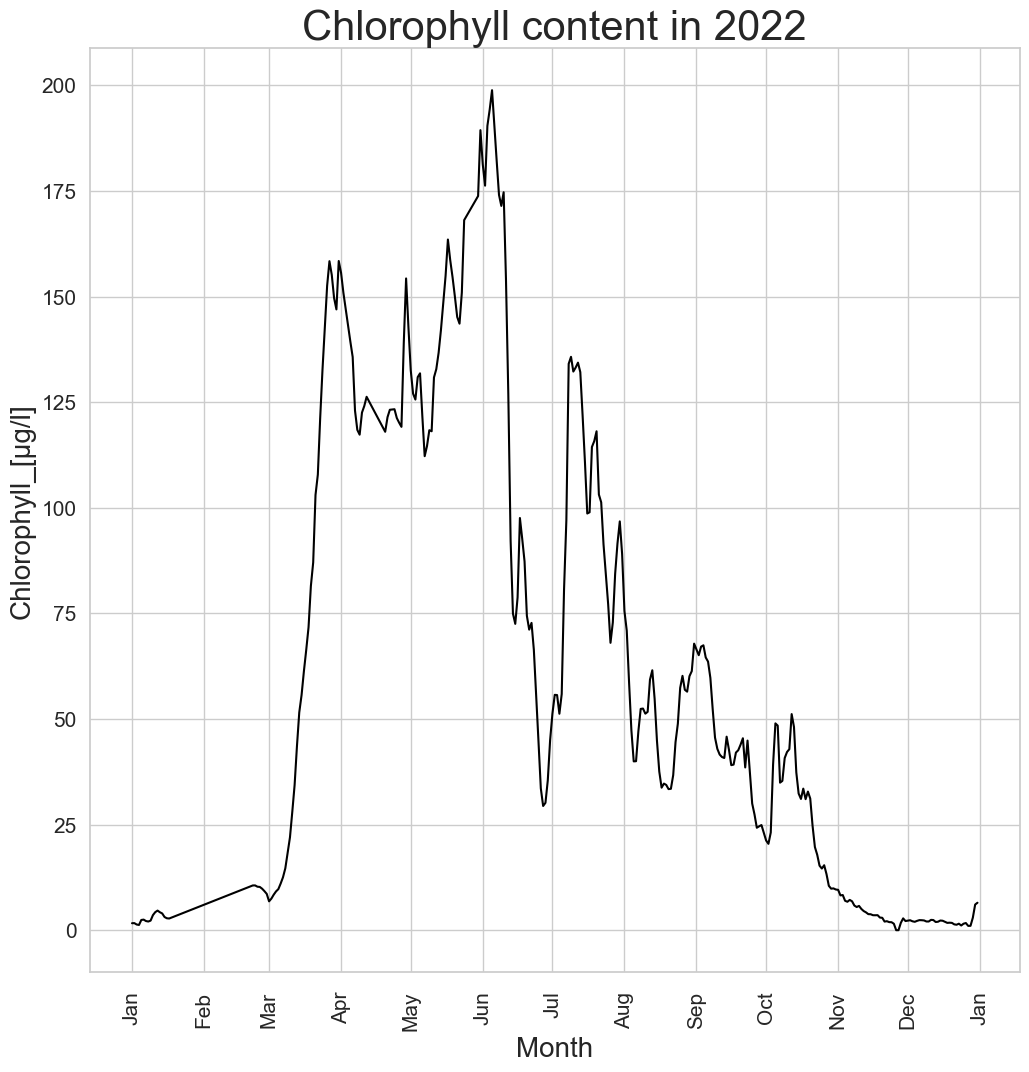

In [7]:
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(12, 12))
fig = sns.lineplot(data = df_cl22, x='Datum', y='Chlorophyll_[µg/l]', ci = None, c = 'black')
fig.axes.set_title("Chlorophyll content in 2022",fontsize=30)
fig.set_xlabel("Month",fontsize=20)
fig.set_ylabel("Chlorophyll_[µg/l]",fontsize=20)
fig.tick_params(labelsize=15)
import matplotlib.dates as md
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.WeekdayLocator(interval = 1))
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)
plt.show()


NameError: name 'x_ticks' is not defined

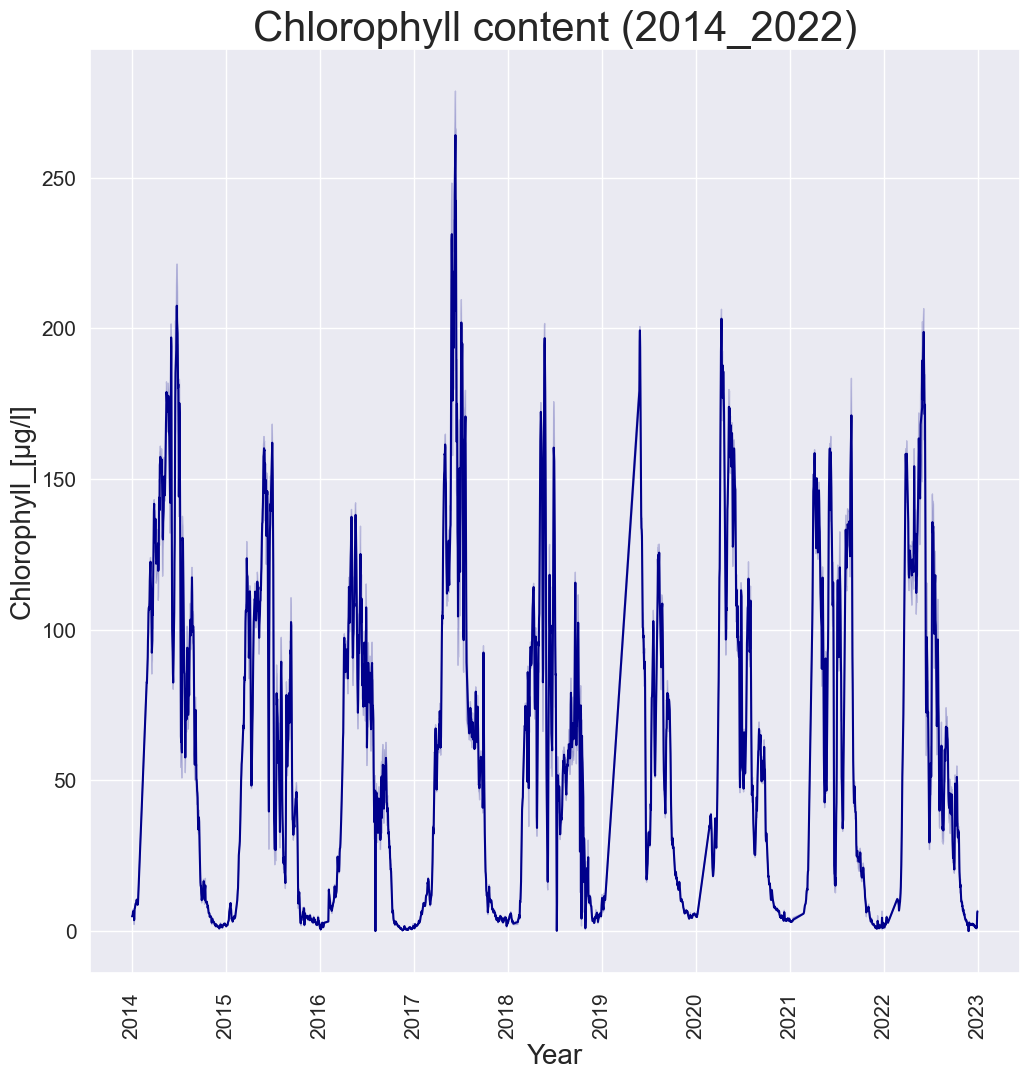

In [19]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(12, 12))
fig = sns.lineplot(data = df_cl, x='Datum', y='Chlorophyll_[µg/l]', c = 'darkblue')
fig.axes.set_title("Chlorophyll content (2014_2022)",fontsize=30)
fig.set_xlabel("Year",fontsize=20)
fig.set_ylabel("Chlorophyll_[µg/l]",fontsize=20)
fig.tick_params(labelsize=15)
import matplotlib.dates as md
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.YearLocator())
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.YearLocator())
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)
ax.set_xticklabels(x_ticks, fontsize=10)
plt.show()
